In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import copy

In [2]:
%config Completer.use_jedi = False
%matplotlib inline

In [22]:
def to_set_fold(model_file):
    stripped = model_file.replace('best_model_v_', '')
    stripped = stripped.replace('.h5', '')
    stripped = stripped.replace('_drop', '')
    return stripped[:-1], int(stripped[-1])

In [26]:
dats = []
for fold in range(4):
    dat = pd.read_csv(f'data_splits/valmix/f1_scores_valmix_fold{fold}.csv', header=None)
    dats.append(dat)

In [30]:
dat = pd.concat(dats)

In [31]:

dat.columns = ['model', 'species', 'genic_f1', 'sub_genic_f1']

dat.loc[:, ["valset", "fold"]] = [to_set_fold(m) for m in dat.loc[:, "model"]]

In [46]:
#dat.sort_values(by=['fold', 'species'], ascending=True)

,model,species,genic_f1,sub_genic_f1,valset,fold
17,best_model_v_all_drop0.h5,BrapaFPsc,0.8948,0.9101,all,0
45,best_model_v_train_drop0.h5,BrapaFPsc,0.8873,0.9115,train,0
46,best_model_v_eval_drop0.h5,BrapaFPsc,0.9142,0.9391,eval,0
4,best_model_v_train_drop0.h5,Carietinum,0.8318,0.8318,train,0
23,best_model_v_all_drop0.h5,Carietinum,0.8385,0.8385,all,0
...,...,...,...,...,...,...
30,best_model_v_eval_drop3.h5,Tcacao,0.8285,0.8821,eval,3
51,best_model_v_all_drop3.h5,Tcacao,0.8301,0.8690,all,3
23,best_model_v_all_drop3.h5,Vcarteri,0.6411,0.6784,all,3
35,best_model_v_eval_drop3.h5,Vcarteri,0.7413,0.7960,eval,3


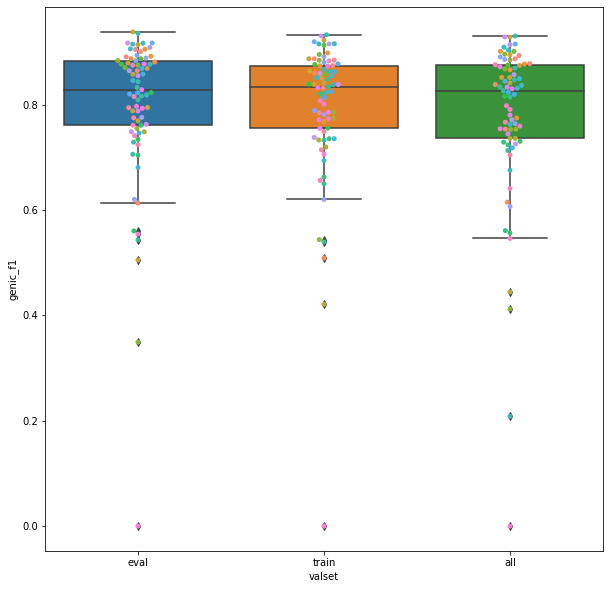

In [47]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='valset', y='genic_f1', data=dat)
 
ax = sns.swarmplot(x='valset', y='genic_f1', data=dat, hue="species")
ax.get_legend().remove()

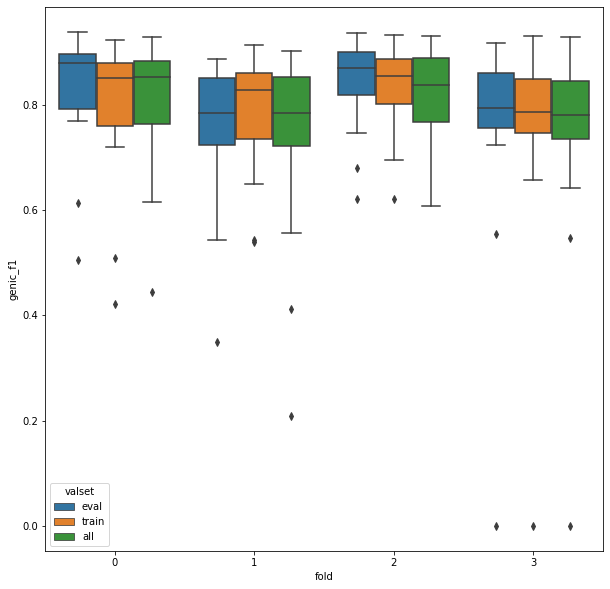

In [40]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='fold', hue='valset', y='genic_f1', data=dat)
 
#ax = sns.swarmplot(x='valset', y='genic_f1', data=dat, hue="species")
#ax.get_legend().remove()

In [62]:
pivotted = dat.pivot(columns='valset', index=['species', 'fold'], values='genic_f1')

Text(0.5, 0, 'species, sorted')

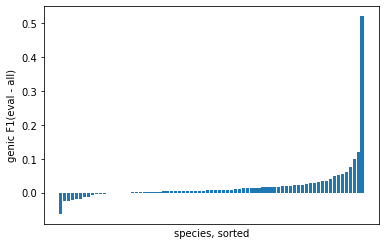

In [63]:
plt.bar(height=np.sort(pivotted['eval'] - pivotted['all']), x=range(pivotted.shape[0]))
plt.ylabel("genic F1(eval - all)")
plt.xticks([])
plt.xlabel("species, sorted")

Text(0.5, 0, 'species, sorted')

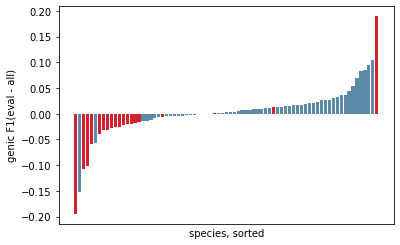

In [90]:
mycol = np.array([['#5D8AA8', '#D3212D', '#5D8AA8', '#5D8AA8'][x[1]] for x in pivotted.index])
differences = pivotted['eval'] - pivotted['train']
plt.bar(height=np.sort(differences), x=range(pivotted.shape[0]), 
        color=mycol[np.argsort(np.array(differences))])
plt.ylabel("genic F1(eval - all)")
plt.xticks([])
plt.xlabel("species, sorted")

In [95]:
differences[np.argsort(np.array(differences))][:20]


species       fold
Creinhardtii  1      -0.1947
Dsalina       3      -0.1516
Hannuus       1      -0.1065
Aofficinalis  1      -0.1022
Ncolorata     1      -0.0595
Atrichopoda   2      -0.0572
Vunguiculata  1      -0.0392
Sbicolor      1      -0.0312
Tpratense     1      -0.0310
Oeuropaea     1      -0.0268
Gsoja         1      -0.0257
Osativa       1      -0.0257
Stuberosum    1      -0.0214
Dcarota       1      -0.0204
Graimondii    1      -0.0198
Bhybridum     1      -0.0176
Sitalica      1      -0.0161
Athaliana     3      -0.0135
Acomosus      2      -0.0134
Fvesca        3      -0.0120
dtype: float64

Text(0.5, 0, 'species, sorted')

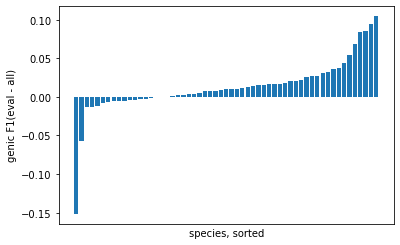

In [58]:
subdat = dat.loc[[x in [0, 2, 3] for x in dat.loc[:,'fold']], :]
pivotted = subdat.pivot(columns='valset', index='species', values='genic_f1')
plt.bar(height=np.sort(pivotted['eval'] - pivotted['train']), x=range(pivotted.shape[0]))
plt.ylabel("genic F1(eval - all)")
plt.xticks([])
plt.xlabel("species, sorted")

Text(0.5, 0, 'species, sorted')

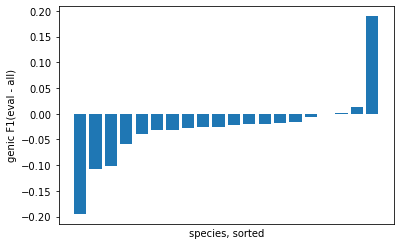

In [59]:
subdat = dat.loc[[x in [1] for x in dat.loc[:,'fold']], :]
pivotted = subdat.pivot(columns='valset', index='species', values='genic_f1')
plt.bar(height=np.sort(pivotted['eval'] - pivotted['train']), x=range(pivotted.shape[0]))
plt.ylabel("genic F1(eval - all)")
plt.xticks([])
plt.xlabel("species, sorted")

Text(0.5, 0, 'species, sorted')

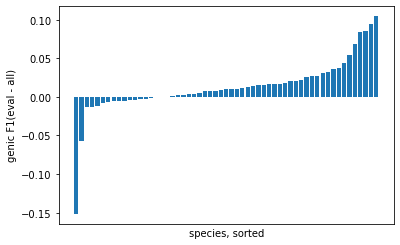

In [91]:
epochs = pd.read_csv('data_splits/valmix/epochs_to_best.csv')

In [92]:
epochs

,fold,set,epoch,hash
0,0,eval,5,VtzmK
1,0,train,12,iuc5a
2,0,all,3,IIAEQ
3,1,eval,2,lLBLH
4,1,train,5,l3awM
5,1,all,4,qaxts
6,2,eval,3,z1xSi
7,2,train,7,IyHi3
8,2,all,9,dv1rx
9,3,eval,2,mlXSZ
